# COVID-19 Exploratory Analysis - Growth Rate among countries

This notebook analyses growth rates for COVID-19 per country.

COVID-19 cases data from [Our World in Data](www.ourworldindata.org)


In [45]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import importlib
import numpy as np
import seaborn as sns; sns.set()
import os
from scipy.spatial.distance import squareform
from scipy.spatial.distance import pdist, euclidean
from datetime import datetime


pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)


In [46]:
data_dir = '../data/coronavirus/'

df_orig = pd.read_csv(data_dir + 'total_cases_normalized.csv')

# df_orig['Day'] = df_orig['Day'] - df_orig['Day'].min()

df_orig

Country        Date  Total  Day  TotalDeaths  DayNorm  GrowthRate  GrowthRateDeaths  DaysToDouble  DaysToDoubleDeaths
0     Afghanistan  2019-12-31    0.0    0          0.0      NaN         NaN               NaN           NaN                 NaN
1     Afghanistan  2020-01-01    0.0    1          0.0      NaN         NaN               NaN           NaN                 NaN
2     Afghanistan  2020-01-02    0.0    2          0.0      NaN         NaN               NaN           NaN                 NaN
3     Afghanistan  2020-01-03    0.0    3          0.0      NaN         NaN               NaN           NaN                 NaN
4     Afghanistan  2020-01-04    0.0    4          0.0      NaN         NaN               NaN           NaN                 NaN
...           ...         ...    ...  ...          ...      ...         ...               ...           ...                 ...
6669     Zimbabwe  2020-03-21    1.0   81          0.0      NaN         NaN               NaN           NaN                 NaN
6670     Zimbabwe  2020-03-22    2.0   82          0.0      NaN         2.0               NaN           1.0                 NaN
6671     Zimbabwe  2020-03-23    2.0   83          0.0      NaN         1.0               NaN           1.0                 NaN
6672     Zimbabwe  2020-03-24    2.0   84          1.0      NaN         1.0               NaN           1.0                 NaN
6673     Zimbabwe  2020-03-25    2.0   85          1.0      NaN         1.0               1.0           1.0                 1.0

[6674 rows x 10 columns]

In [47]:
df_orig_piv_day = df_orig.pivot(index='Country', columns='Day', values='TotalDeaths')

df_orig_piv_day = df_orig_piv_day.fillna(0)

# df_orig_piv_day.columns = range(df_orig_piv_day.shape[1])

df_orig_piv_day

Day                                0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21    22    23    24    25    26    27     28     29     30     31     32     33     34     35     36     37     38     39     40     41      42      43      44      45      46      47      48      49      50      51      52      53      54      55      56      57      58      59      60      61      62      63      64      65      66      67      68      69      70      71      72      73      74      75      76      77      78      79      80      81      82      83      84      85
Country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
Afghanistan                       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     1.0
Albania                           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     2.0     2.0     2.0     2.0     2.0     4.0     5.0
Algeria                           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     2.0     2.0     4.0     4.0     5.0     6.0     7.0    10.0    10.0    15.0    17.0    17.0
Andorra                           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0
Angola                            0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.

## Country Analysis

The graphs below show the weekly growth rates for all countries. Line colors are based on the average temperatures (red -> warmer).

Colder countries seem to have, in general, higher rates.

In [48]:
country = 'Brazil'

sr_country = df_orig_piv_day.loc[country,]

country_start = (sr_country > 0).idxmax()

country_start_cases = (df_orig.set_index('Country').loc[country,].set_index('Day')['Total'] > 0).idxmax()

df_countries_ahead = df_orig_piv_day[df_orig_piv_day.iloc[:, country_start - 14] > 0.0]

df_countries_ahead


Day             0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21    22    23    24    25    26    27     28     29     30     31     32     33     34     35     36     37     38     39     40     41      42      43      44      45      46      47      48      49      50      51      52      53      54      55      56      57      58      59      60      61      62      63      64      65      66      67      68      69      70      71      72      73      74      75      76      77      78      79      80      81      82      83      84      85
Country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
Australia      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     1.0     1.0     1.0     2.0     2.0     2.0     3.0     3.0     3.0     3.0     3.0     3.0     3.0     3.0     5.0     5.0     5.0     6.0     6.0     7.0     7.0     7.0     7.0     8.0
China          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  3.0  3.0  6.0  17.0  17.0  26.0  41.0  56.0  81.0  106.0  132.0  170.0  213.0  259.0  304.0  361.0  426.0  492.0  564.0  637.0  723.0  812.0  909.0  1017.0  1114.0  1368.0  1381.0  1524.0  1666.0  1771.0  1869.0  2008.0  2120.0  2238.0  2347.0  2445.0  2595.0  2665.0  2717.0  2746.0  2790.0  2837.0  2872.0  2914.0  2946.0  2983.0  3014.0  3044.0  3072.0  3099.0  3122.0  3139.0  3161.0  3172.0  3179.0  3194.0  3203.0  3217.0  3226.0  3242.0  3250.0  3254.0  3261.0  3267.0  3276.0  3283.0  3287.0
France         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     2.0     2.0     2.0     2.0     2.0     3.0     4.0     4.0     7.0     9.0    10.0    19.0    30.0    33.0    48.0    61.0    79.0    91.0   127.0   148.0   175.0   244.0   372.0   450.0   562.0   674.0   860.0  1100.0
Iran           0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     2.0     2.0     4.0     5.0     8.0    12.0    15.0    19.0    26.0    34.0    43.0    54.0    66.0    77.0    92.0   107.0   124.0   145.0   194.0   237.0   291.0   354.0   429.0   514.0   611.0   724.0   853.0   988.0  1135.0  1284.0  1433.0  1556.0  1685.0  1812.0  1934.0
Italy          0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

In [49]:
df_countries_rate_norm = df_orig_piv_day.loc[df_countries_ahead.index, :]

# df_countries_rate_norm = df_orig_piv_day.loc[['France', 'Italy'], :]

df_countries_rate_norm = df_countries_rate_norm.append(df_orig_piv_day.loc[country,])

#reverse order to keep base country on top
df_countries_rate_norm = df_countries_rate_norm.iloc[::-1]

df_countries_rate_norm

Day             0    1    2    3    4    5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21    22    23    24    25    26    27     28     29     30     31     32     33     34     35     36     37     38     39     40     41      42      43      44      45      46      47      48      49      50      51      52      53      54      55      56      57      58      59      60      61      62      63      64      65      66      67      68      69      70      71      72      73      74      75      76      77      78      79      80      81      82      83      84      85
Country                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
Brazil         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     4.0     6.0    11.0    18.0    25.0    34.0    46.0
United States  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     2.0     6.0     9.0    11.0    12.0    14.0    17.0    21.0    26.0    28.0    30.0    40.0    47.0    57.0    69.0    85.0   108.0   150.0   150.0   260.0   340.0   471.0   590.0   801.0
Taiwan         0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     0.0     1.0     1.0     1.0     1.0     0.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0     2.0     2.0     2.0     2.0     2.0
South Korea    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     1.0     2.0     5.0     7.0     8.0    11.0    12.0    13.0    16.0    17.0    22.0    28.0    32.0    35.0    42.0    44.0    50.0    51.0    54.0    60.0    66.0    67.0    72.0    75.0    75.0    81.0    86.0    91.0   100.0   103.0   104.0   113.0   120.0   126.0
San Marino     0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

In [50]:
sr_country = df_orig_piv_day.loc[country,]

country_start = (sr_country > 0).idxmax()

sr_country_compare = sr_country.loc[country_start:].dropna()


sr_country.loc[country_start:]

Day
78     1.0
79     4.0
80     6.0
81    11.0
82    18.0
83    25.0
84    34.0
85    46.0
Name: Brazil, dtype: float64

In [51]:
sr_country = df_orig_piv_day.loc[country,]

country_start = (sr_country > 0).idxmax()

sr_country_compare = sr_country.loc[country_start:].dropna()

df_countries_gap = pd.DataFrame({'Country':[], 'gap':[], 'dist':[]})

df_countries_gap = df_countries_gap.append(pd.Series([country, 0.0, -1], index = df_countries_gap.columns), ignore_index=True)

for other_country in df_countries_rate_norm.index[1:]:
    print(other_country)

    sr_other_country = df_countries_rate_norm.loc[other_country,].fillna(0)

    print(sr_other_country)

    min_dist = np.inf

    min_pos = 0

    for i in range(0, 1 + len(sr_other_country) - len(sr_country_compare)):
        sr_other_country_compare = sr_other_country[i: i+ len(sr_country_compare)]
        dist = euclidean(sr_country_compare, sr_other_country_compare)
        print(sr_country_compare.values, sr_other_country_compare.values, dist)

        if (dist < min_dist):
            min_dist = dist
            min_pos = i

    df_countries_gap = df_countries_gap.append(pd.Series([other_country, min_pos - country_start, min_dist], index = df_countries_gap.columns), ignore_index=True)

df_countries_gap = df_countries_gap.set_index('Country')

df_countries_gap

United States
Day
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
30      0.0
31      0.0
32      0.0
33      0.0
34      0.0
35      0.0
36      0.0
37      0.0
38      0.0
39      0.0
40      0.0
41      0.0
42      0.0
43      0.0
44      0.0
45      0.0
46      0.0
47      0.0
48      0.0
49      0.0
50      0.0
51      0.0
52      0.0
53      0.0
54      0.0
55      0.0
56      0.0
57      0.0
58      0.0
59      0.0
60      0.0
61      1.0
62      2.0
63      6.0
64      9.0
65     11.0
66     12.0
67     14.0
68     17.0
69     21.0
70     26.0
71     28.0
72     30.0
73     40.0
74     47.0
75     57.0
76     69.0
77     85.0
78    108.0
79    150.0
80    150.0
81    260.

[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.2

[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 1.] 65.60487786742691
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 1. 1.] 65.09224224129939
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 1. 1. 1.] 64.71475874945375
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 1. 1. 1. 1.] 64.4437739428721
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 1. 1. 1. 1. 1.] 64.28063471995279
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 1. 1. 1. 1. 1. 1.] 64.19

[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.29479617586888
[ 1.  4.  6. 11. 18. 25. 34. 46.] [0. 0. 0. 0. 0. 0. 0. 0.] 66.2

[ 1.  4.  6. 11. 18. 25. 34. 46.] [ 26.  41.  56.  81. 106. 132. 170. 213.] 273.81015320838634
[ 1.  4.  6. 11. 18. 25. 34. 46.] [ 41.  56.  81. 106. 132. 170. 213. 259.] 361.08863177895813
[ 1.  4.  6. 11. 18. 25. 34. 46.] [ 56.  81. 106. 132. 170. 213. 259. 304.] 457.41884526110204
[ 1.  4.  6. 11. 18. 25. 34. 46.] [ 81. 106. 132. 170. 213. 259. 304. 361.] 568.2138681869706
[ 1.  4.  6. 11. 18. 25. 34. 46.] [106. 132. 170. 213. 259. 304. 361. 426.] 694.5214179562787
[ 1.  4.  6. 11. 18. 25. 34. 46.] [132. 170. 213. 259. 304. 361. 426. 492.] 834.4710899725646
[ 1.  4.  6. 11. 18. 25. 34. 46.] [170. 213. 259. 304. 361. 426. 492. 564.] 989.2613405971144
[ 1.  4.  6. 11. 18. 25. 34. 46.] [213. 259. 304. 361. 426. 492. 564. 637.] 1155.857690202388
[ 1.  4.  6. 11. 18. 25. 34. 46.] [259. 304. 361. 426. 492. 564. 637. 723.] 1338.636993363025
[ 1.  4.  6. 11. 18. 25. 34. 46.] [304. 361. 426. 492. 564. 637. 723. 812.] 1536.6053494635505
[ 1.  4.  6. 11. 18. 25. 34. 46.] [361. 426. 492. 564. 6

gap       dist
Country                       
Brazil          0.0  -1.000000
United States -14.0  23.727621
Taiwan          0.0  62.128898
South Korea   -21.0  21.908902
San Marino     -1.0  33.151169
Japan          -8.0  26.739484
Italy         -23.0  13.928388
Iran          -24.0   9.746794
France        -13.0   7.681146
China         -60.0  13.784049
Australia       0.0  51.516987

In [52]:

similar_countries = df_countries_gap.sort_values('dist')


# 1.0/np.sqrt(similar_countries.iloc[i, 1]+1)

similar_countries['Similarity'] = similar_countries['dist'].apply(lambda x: 1.0/np.sqrt(x+1) if x >= 0 else 1)

similar_countries

gap       dist  Similarity
Country                                   
Brazil          0.0  -1.000000    1.000000
France        -13.0   7.681146    0.339400
Iran          -24.0   9.746794    0.305043
China         -60.0  13.784049    0.260078
Italy         -23.0  13.928388    0.258817
South Korea   -21.0  21.908902    0.208929
United States -14.0  23.727621    0.201099
Japan          -8.0  26.739484    0.189868
San Marino     -1.0  33.151169    0.171119
Australia       0.0  51.516987    0.137991
Taiwan          0.0  62.128898    0.125859

In [53]:
tuples = [tuple(x) for x in similar_countries[1:8].reset_index().to_numpy()]

tuples

[('France', -13.0, 7.681145747868608, 0.33939971724605217),
 ('Iran', -24.0, 9.746794344808963, 0.30504262598558335),
 ('China', -60.0, 13.784048752090222, 0.26007781448593215),
 ('Italy', -23.0, 13.92838827718412, 0.25881744098385384),
 ('South Korea', -21.0, 21.908902300206645, 0.2089285835580457),
 ('United States', -14.0, 23.727621035409346, 0.201098500304134),
 ('Japan', -8.0, 26.739483914241877, 0.18986757848269456)]

In [54]:
top = 6 # number of similar countries to plot

df_total_cases = df_orig.set_index('Country')

top_countries = list(similar_countries.head(top).index)

# top_countries.reverse()

df_total_cases_top = df_total_cases.loc[top_countries,:]

df_total_cases_top

Date    Total  Day  TotalDeaths  DayNorm  GrowthRate  GrowthRateDeaths  DaysToDouble  DaysToDoubleDeaths
Country                                                                                                                    
Brazil       2019-12-31      0.0    0          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-01      0.0    1          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-02      0.0    2          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-03      0.0    3          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-04      0.0    4          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-05      0.0    5          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-06      0.0    6          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-07      0.0    7          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-08      0.0    8          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-09      0.0    9          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-10      0.0   10          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-11      0.0   11          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-12      0.0   12          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-13      0.0   13          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-14      0.0   14          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-15      0.0   15          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-16      0.0   16          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-17      0.0   17          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-18      0.0   18          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-19      0.0   19          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-20      0.0   20          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-21      0.0   21          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-22      0.0   22          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-23      0.0   23          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-24      0.0   24          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-25      0.0   25          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-26      0.0   26          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-27      0.0   27          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-28      0.0   28          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-29      0.0   29          0.0      NaN         NaN               NaN           NaN                 NaN
Brazil       2020-01-30      0.0   30          0.0 

In [55]:
df_total_cases_top = df_total_cases_top.join(similar_countries)

df_total_cases_top['DayAdj'] = ((df_total_cases_top['Day'] - df_total_cases_top['gap']) -1).astype(int)

df_total_cases_top

Date    Total  Day  TotalDeaths  DayNorm  GrowthRate  GrowthRateDeaths  DaysToDouble  DaysToDoubleDeaths   gap       dist  Similarity  DayAdj
Country                                                                                                                                                         
Brazil       2019-12-31      0.0    0          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      -1
Brazil       2020-01-01      0.0    1          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000       0
Brazil       2020-01-02      0.0    2          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000       1
Brazil       2020-01-03      0.0    3          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000       2
Brazil       2020-01-04      0.0    4          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000       3
Brazil       2020-01-05      0.0    5          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000       4
Brazil       2020-01-06      0.0    6          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000       5
Brazil       2020-01-07      0.0    7          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000       6
Brazil       2020-01-08      0.0    8          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000       7
Brazil       2020-01-09      0.0    9          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000       8
Brazil       2020-01-10      0.0   10          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000       9
Brazil       2020-01-11      0.0   11          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      10
Brazil       2020-01-12      0.0   12          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      11
Brazil       2020-01-13      0.0   13          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      12
Brazil       2020-01-14      0.0   14          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      13
Brazil       2020-01-15      0.0   15          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      14
Brazil       2020-01-16      0.0   16          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      15
Brazil       2020-01-17      0.0   17          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      16
Brazil       2020-01-18      0.0   18          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      17
Brazil       2020-01-19      0.0   19          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      18
Brazil       2020-01-20      0.0   20          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      19
Brazil       2020-01-21      0.0   21          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000      20
Brazil       2020-01-22      0.0   22          0.0      NaN         NaN               NaN           NaN                 NaN   0.0  -1.000000    1.000000   

In [56]:

df_total_cases_top = df_total_cases_top[df_total_cases_top['DayAdj'] >= country_start_cases]

df_total_cases_top

Date    Total  Day  TotalDeaths  DayNorm  GrowthRate  GrowthRateDeaths  DaysToDouble  DaysToDoubleDeaths   gap       dist  Similarity  DayAdj
Country                                                                                                                                                         
Brazil       2020-02-27      1.0   58          0.0      NaN    1.000000               NaN      1.000000                 NaN   0.0  -1.000000    1.000000      57
Brazil       2020-02-28      1.0   59          0.0      NaN    1.000000               NaN      1.000000                 NaN   0.0  -1.000000    1.000000      58
Brazil       2020-02-29      1.0   60          0.0      NaN    1.000000               NaN      1.000000                 NaN   0.0  -1.000000    1.000000      59
Brazil       2020-03-01      2.0   61          0.0      NaN    2.000000               NaN      1.000000                 NaN   0.0  -1.000000    1.000000      60
Brazil       2020-03-02      2.0   62          0.0      NaN    1.000000               NaN      1.000000                 NaN   0.0  -1.000000    1.000000      61
Brazil       2020-03-05      3.0   65          0.0      NaN    1.500000               NaN      1.709511                 NaN   0.0  -1.000000    1.000000      64
Brazil       2020-03-06      8.0   66          0.0      NaN    2.666667               NaN      0.706695                 NaN   0.0  -1.000000    1.000000      65
Brazil       2020-03-07     13.0   67          0.0      NaN    1.625000               NaN      1.427675                 NaN   0.0  -1.000000    1.000000      66
Brazil       2020-03-08     13.0   68          0.0      NaN    1.000000               NaN      1.000000                 NaN   0.0  -1.000000    1.000000      67
Brazil       2020-03-09     25.0   69          0.0      NaN    1.923077               NaN      1.059977                 NaN   0.0  -1.000000    1.000000      68
Brazil       2020-03-11     34.0   71          0.0      NaN    1.360000               NaN      2.254249                 NaN   0.0  -1.000000    1.000000      70
Brazil       2020-03-12     52.0   72          0.0      0.0    1.529412               NaN      1.631383                 NaN   0.0  -1.000000    1.000000      71
Brazil       2020-03-13     77.0   73          0.0      1.0    1.480769               NaN      1.765702                 NaN   0.0  -1.000000    1.000000      72
Brazil       2020-03-14     98.0   74          0.0      2.0    1.272727               NaN      2.874197                 NaN   0.0  -1.000000    1.000000      73
Brazil       2020-03-15    121.0   75          0.0      3.0    1.234694               NaN      3.287815                 NaN   0.0  -1.000000    1.000000      74
Brazil       2020-03-16    200.0   76          0.0      4.0    1.652893               NaN      1.379324                 NaN   0.0  -1.000000    1.000000      75
Brazil       2020-03-17    234.0   77          0.0      5.0    1.170000               NaN      4.414845                 NaN   0.0  -1.000000    1.000000      76
Brazil       2020-03-18    291.0   78          1.0      6.0    1.243590               NaN      3.179543                 NaN   0.0  -1.000000    1.000000      77
Brazil       2020-03-19    428.0   79          4.0      7.0    1.470790          4.000000      1.796649            0.500000   0.0  -1.000000    1.000000      78
Brazil       2020-03-20    621.0   80          6.0      8.0    1.450935          1.500000      1.862258            1.709511   0.0  -1.000000    1.000000      79
Brazil       2020-03-21    904.0   81         11.0      9.0    1.455717          1.833333      1.845940            1.143551   0.0  -1.000000    1.000000      80
Brazil       2020-03-22   1128.0   82         18.0     10.0    1.247788          1.636364      3.131141            1.407473   0.0  -1.000000    1.000000      81
Brazil       2020-03-23   1546.0   83         25.0     11.0    1.370567          1.388889      2.198898            2.110011   0.0  -1.000000    1.000000   

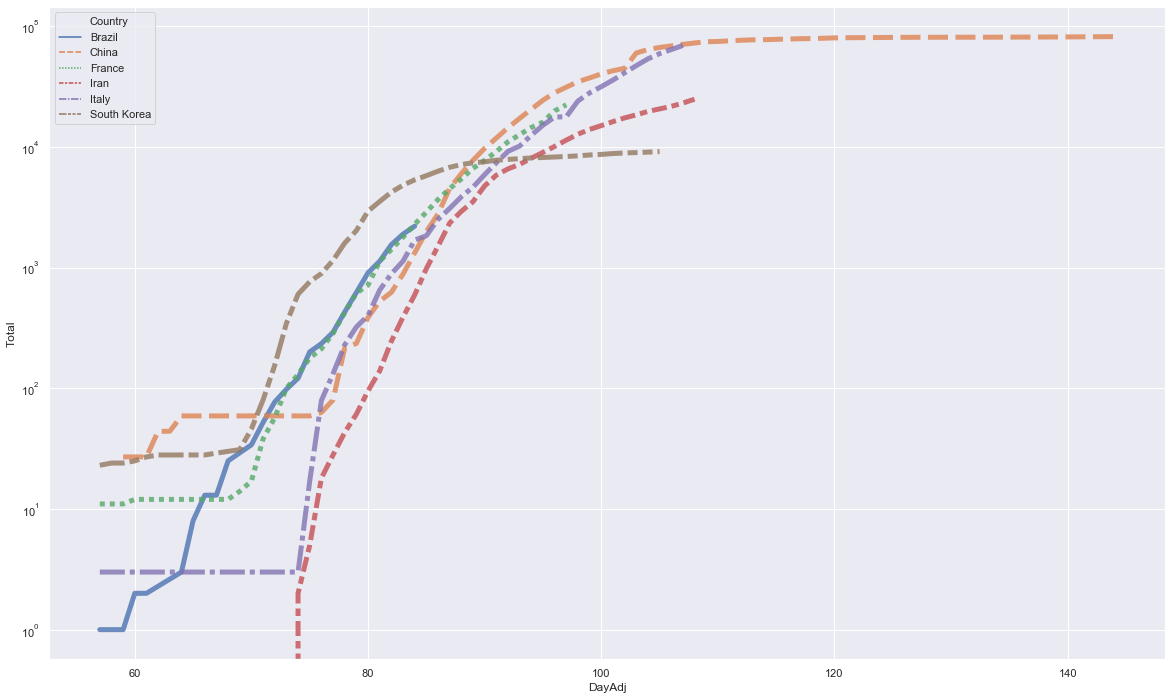

In [57]:
fig, ax = plt.subplots(figsize=(20, 12))

ax = sns.lineplot(x="DayAdj", y='Total', hue="Country", style="Country", lw = 5, alpha = 0.8, data=df_total_cases_top.reset_index())

ax.set_yscale('log')

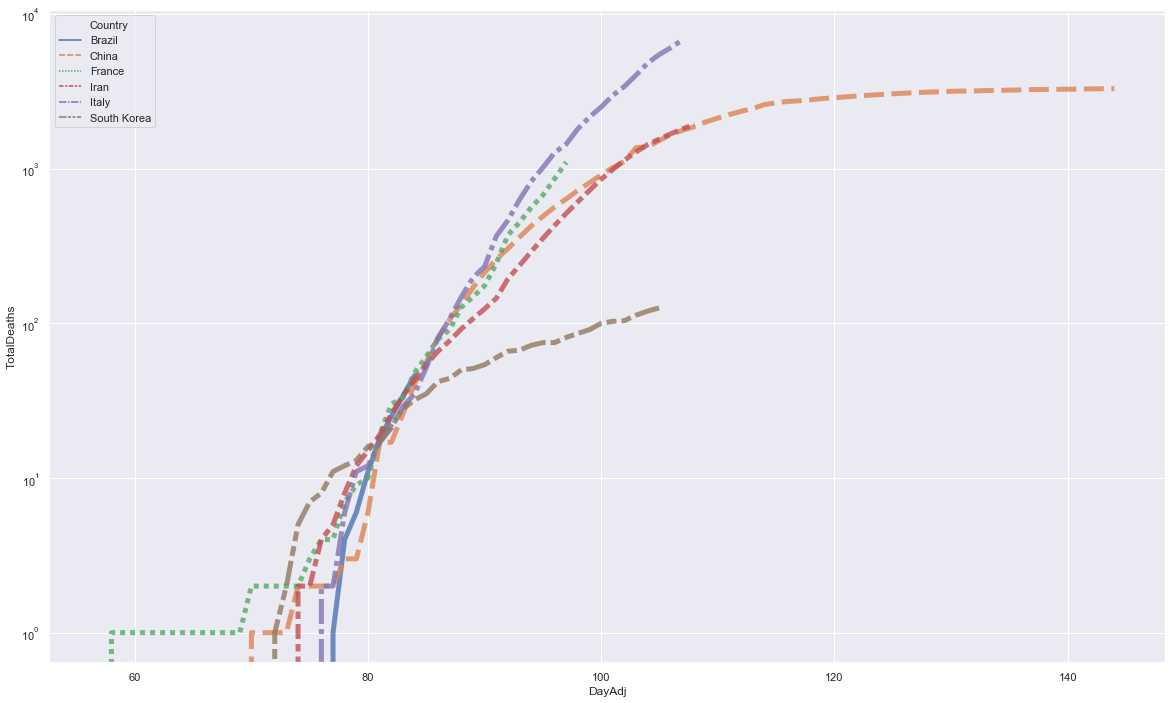

In [58]:
fig, ax = plt.subplots(figsize=(20, 12))

ax = sns.lineplot(x="DayAdj", y='TotalDeaths', hue="Country", style="Country", lw = 5, alpha = 0.8, data=df_total_cases_top.reset_index())

ax.set_yscale('log')

In [59]:
countries_to_show = similar_countries.index[:2]

df_countries_to_show = df_total_cases_top.loc[countries_to_show,:].reset_index()

df_countries_to_show

Country        Date    Total  Day  TotalDeaths  DayNorm  GrowthRate  GrowthRateDeaths  DaysToDouble  DaysToDoubleDeaths   gap      dist  Similarity  DayAdj
0   Brazil  2020-02-27      1.0   58          0.0      NaN    1.000000               NaN      1.000000                 NaN   0.0 -1.000000      1.0000      57
1   Brazil  2020-02-28      1.0   59          0.0      NaN    1.000000               NaN      1.000000                 NaN   0.0 -1.000000      1.0000      58
2   Brazil  2020-02-29      1.0   60          0.0      NaN    1.000000               NaN      1.000000                 NaN   0.0 -1.000000      1.0000      59
3   Brazil  2020-03-01      2.0   61          0.0      NaN    2.000000               NaN      1.000000                 NaN   0.0 -1.000000      1.0000      60
4   Brazil  2020-03-02      2.0   62          0.0      NaN    1.000000               NaN      1.000000                 NaN   0.0 -1.000000      1.0000      61
5   Brazil  2020-03-05      3.0   65          0.0      NaN    1.500000               NaN      1.709511                 NaN   0.0 -1.000000      1.0000      64
6   Brazil  2020-03-06      8.0   66          0.0      NaN    2.666667               NaN      0.706695                 NaN   0.0 -1.000000      1.0000      65
7   Brazil  2020-03-07     13.0   67          0.0      NaN    1.625000               NaN      1.427675                 NaN   0.0 -1.000000      1.0000      66
8   Brazil  2020-03-08     13.0   68          0.0      NaN    1.000000               NaN      1.000000                 NaN   0.0 -1.000000      1.0000      67
9   Brazil  2020-03-09     25.0   69          0.0      NaN    1.923077               NaN      1.059977                 NaN   0.0 -1.000000      1.0000      68
10  Brazil  2020-03-11     34.0   71          0.0      NaN    1.360000               NaN      2.254249                 NaN   0.0 -1.000000      1.0000      70
11  Brazil  2020-03-12     52.0   72          0.0      0.0    1.529412               NaN      1.631383                 NaN   0.0 -1.000000      1.0000      71
12  Brazil  2020-03-13     77.0   73          0.0      1.0    1.480769               NaN      1.765702                 NaN   0.0 -1.000000      1.0000      72
13  Brazil  2020-03-14     98.0   74          0.0      2.0    1.272727               NaN      2.874197                 NaN   0.0 -1.000000      1.0000      73
14  Brazil  2020-03-15    121.0   75          0.0      3.0    1.234694               NaN      3.287815                 NaN   0.0 -1.000000      1.0000      74
15  Brazil  2020-03-16    200.0   76          0.0      4.0    1.652893               NaN      1.379324                 NaN   0.0 -1.000000      1.0000      75
16  Brazil  2020-03-17    234.0   77          0.0      5.0    1.170000               NaN      4.414845                 NaN   0.0 -1.000000      1.0000      76
17  Brazil  2020-03-18    291.0   78          1.0      6.0    1.243590               NaN      3.179543                 NaN   0.0 -1.000000      1.0000      77
18  Brazil  2020-03-19    428.0   79          4.0      7.0    1.470790          4.000000      1.796649            0.500000   0.0 -1.000000      1.0000      78
19  Brazil  2020-03-20    621.0   80          6.0      8.0    1.450935          1.500000      1.862258            1.709511   0.0 -1.000000      1.0000      79
20  Brazil  2020-03-21    904.0   81         11.0      9.0    1.455717          1.833333      1.845940            1.143551   0.0 -1.000000      1.0000      80
21  Brazil  2020-03-22   1128.0   82         18.0     10.0    1.247788          1.636364      3.131141            1.407473   0.0 -1.000000      1.0000      81
22  Brazil  2020-03-23   1546.0   83         25.0     11.0    1.370567          1.388889      2.198898            2.110011   0.0 -1.000000      1.0000      82
23  Brazil  2020-03-24   1891.0   84         34.0     12.0    1.223157          1.360000      3.441049            2.254249   0.0 -1.000000      1.0000      83
24  Brazil  2020-03-25   220

In [60]:
date = datetime.today().strftime('%Y-%m-%d')

y_lim = df_countries_to_show['Total'].max() * 1.2

x_lim1 = country_start_cases

x_lim2 = df_countries_to_show['DayAdj'].max()

x_lim2

97

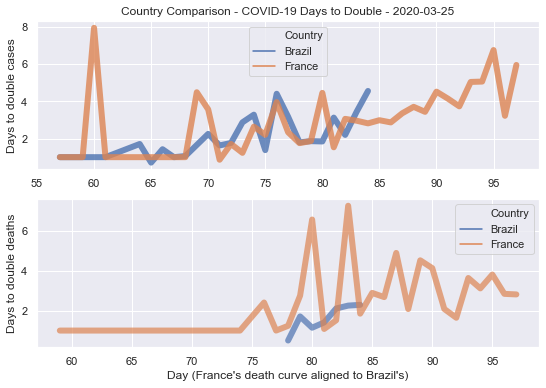

In [61]:
fig, axs = plt.subplots(nrows=2, figsize=(9, 6))


axs[0].set_title('Country Comparison - COVID-19 Days to Double - ' + date)

countries_to_show = df_countries_to_show['Country'].unique()[:2]

sns.lineplot(x="DayAdj", y='DaysToDouble', hue="Country", lw = 6, alpha = 0.8, ax=axs[0], data=df_countries_to_show)


axs[0].set(ylabel='Days to double cases', xlabel='')

sns.lineplot(x="DayAdj", y='DaysToDoubleDeaths', hue="Country", alpha = 0.7, lw = 6, ax=axs[1], data=df_countries_to_show)

axs[1].set(ylabel='Days to double deaths', xlabel="Day ({}'s death curve aligned to {}'s)".format(countries_to_show[1], countries_to_show[0]))

plt.show()

In [62]:
def make_chart_comparison(df_countries_to_show):
    date = datetime.today().strftime('%Y-%m-%d')

    y_lim = df_countries_to_show['Total'].max() * 1.2

    x_lim1 = country_start_cases

    x_lim2 = df_countries_to_show['DayAdj'].max()

    fig, ax = plt.subplots(figsize=(8, 5))

    ax.set_title('Country Comparison - COVID-19 Cases vs. Deaths (log) - ' + date)

    countries_to_show = df_countries_to_show['Country'].unique()[:2]

    ax = sns.scatterplot(x="DayAdj", y='Total', hue="Country", lw = 6, alpha = 0.8, data=df_countries_to_show)


    ax.legend(loc='upper left', title = "Confirmed Cases", frameon=True)

    ax.set_yscale('log')

    ax.set(ylabel='Total Confirmed Cases', xlabel="Day ({}'s death curve aligned to {}'s)".format(countries_to_show[1], countries_to_show[0]))

    ax.set_ylim(1, y_lim)

    ax2 = plt.twinx()

    ax2.set_yscale('log')

    ax2.grid(False)

    sns.lineplot(x="DayAdj", y='TotalDeaths', hue="Country", alpha = 0.7, lw = 6, ax=ax2, data=df_countries_to_show)


    ax2.legend(loc='lower right', title = "Deaths", frameon=True)

    ax2.set(ylabel='Total Deaths')

    # max_deaths = df_total_cases_top.loc[countries_to_show,:]['TotalDeaths'].max()

    # ax2.set_ylim(1, max_deaths * 2)

    ax2.set_ylim(1, y_lim)

    plt.show()
#     plt.clf()

In [63]:
def make_chart_comparison_growth(df_countries_to_show):
    date = datetime.today().strftime('%Y-%m-%d')

    fig, axs = plt.subplots(nrows=2, figsize=(8, 6))


    axs[0].set_title('Country Comparison - COVID-19 Days to Double - ' + date)

    countries_to_show = df_countries_to_show['Country'].unique()[:2]

    sns.lineplot(x="DayAdj", y='DaysToDouble', hue="Country", lw = 6, alpha = 0.8, ax=axs[0], data=df_countries_to_show)


    axs[0].set(ylabel='Days to double cases', xlabel='')

    sns.lineplot(x="DayAdj", y='DaysToDoubleDeaths', hue="Country", alpha = 0.7, lw = 6, ax=axs[1], data=df_countries_to_show)

    axs[1].set(ylabel='Days to double deaths', xlabel="Day ({}'s death curve aligned to {}'s)".format(countries_to_show[1], countries_to_show[0]))


    plt.show()
#     plt.clf()

In [64]:
similar_countries

gap       dist  Similarity
Country                                   
Brazil          0.0  -1.000000    1.000000
France        -13.0   7.681146    0.339400
Iran          -24.0   9.746794    0.305043
China         -60.0  13.784049    0.260078
Italy         -23.0  13.928388    0.258817
South Korea   -21.0  21.908902    0.208929
United States -14.0  23.727621    0.201099
Japan          -8.0  26.739484    0.189868
San Marino     -1.0  33.151169    0.171119
Australia       0.0  51.516987    0.137991
Taiwan          0.0  62.128898    0.125859

Brazil vs. France (similarity of death curve: 0.34)


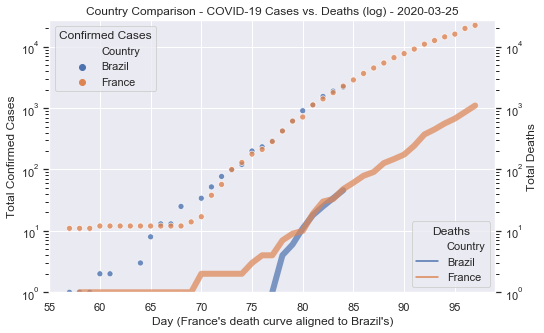

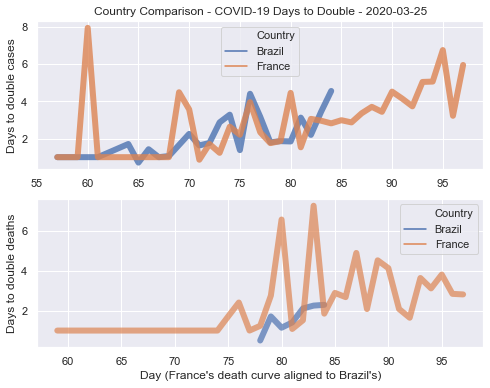

Brazil vs. Iran (similarity of death curve: 0.31)


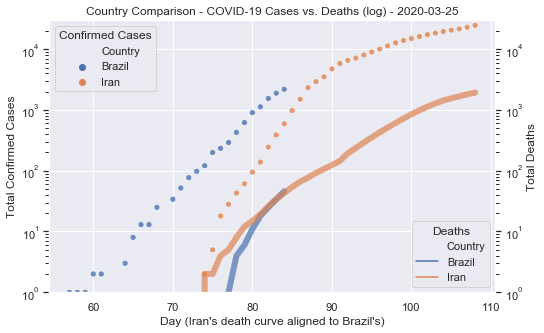

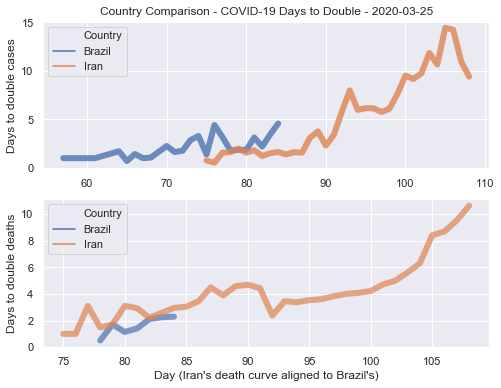

Brazil vs. China (similarity of death curve: 0.26)


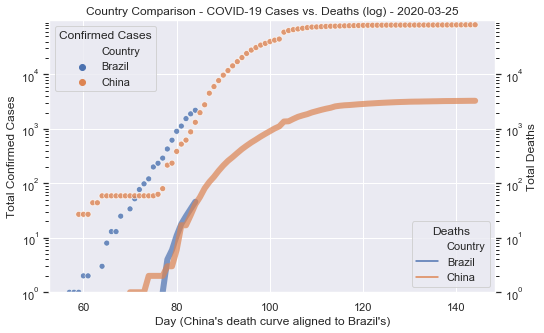

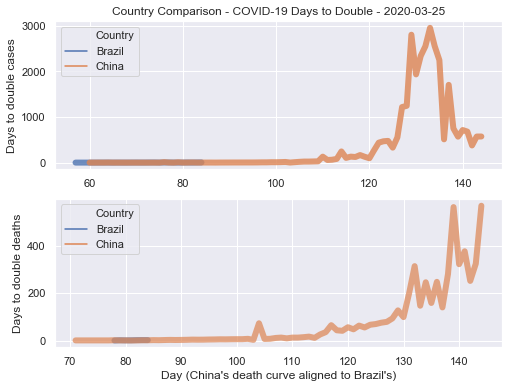

Brazil vs. Italy (similarity of death curve: 0.26)


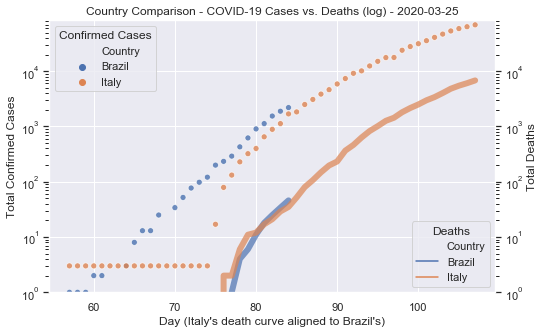

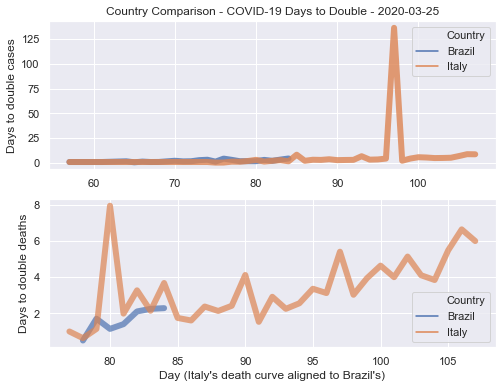

Brazil vs. South Korea (similarity of death curve: 0.21)


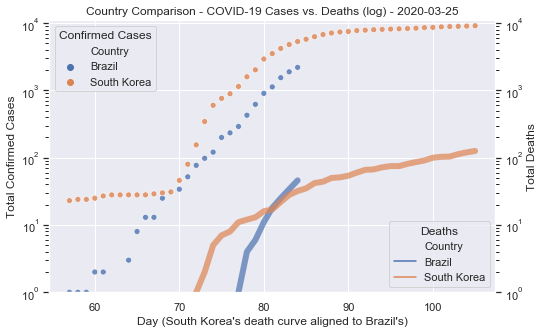

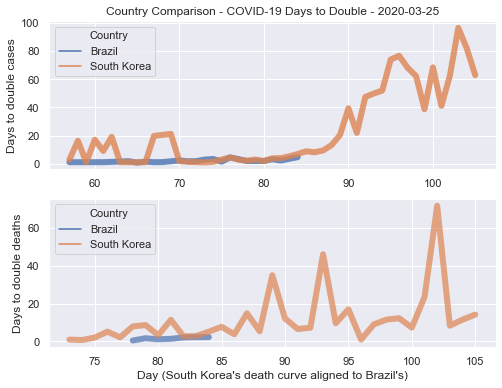

Brazil vs. United States (similarity of death curve: 0.20)


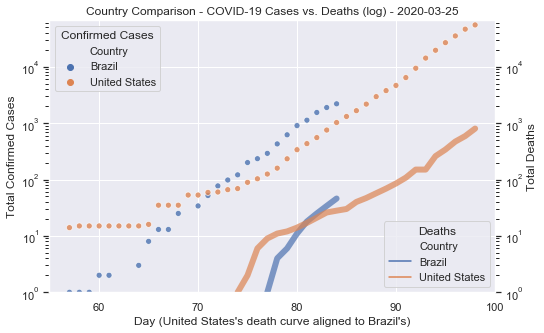

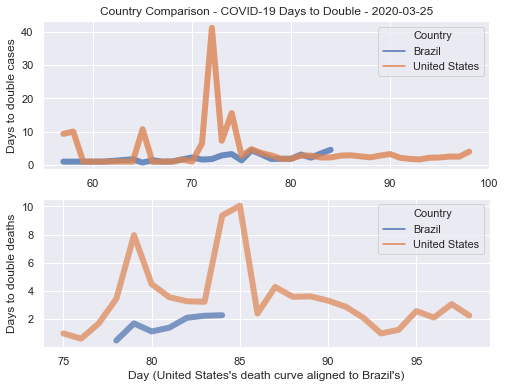

Brazil vs. Japan (similarity of death curve: 0.19)


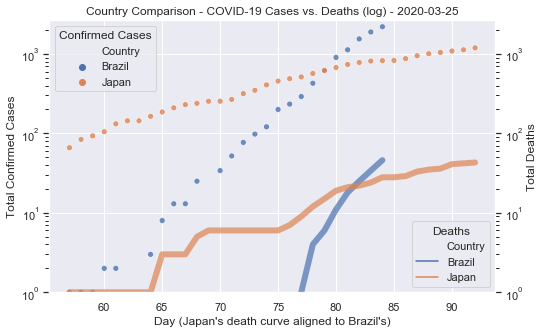

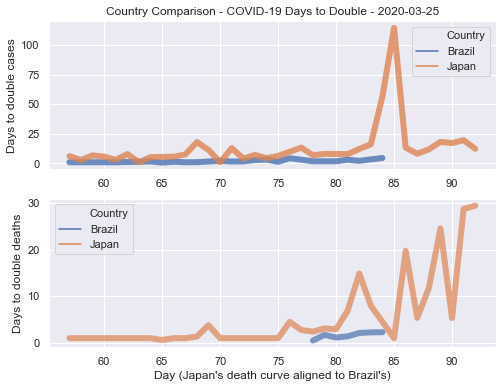

In [65]:

top = 8 # number of similar countries to plot

df_total_cases = df_orig.set_index('Country')

top_countries = list(similar_countries.head(top).index)

df_total_cases_top = df_total_cases.loc[top_countries,:]

df_total_cases_top = df_total_cases_top.join(similar_countries)

df_total_cases_top['DayAdj'] = ((df_total_cases_top['Day'] - df_total_cases_top['gap']) -1).astype(int)

df_total_cases_top = df_total_cases_top[df_total_cases_top['DayAdj'] >= country_start_cases]

for i in range(1, len(top_countries)):
    countries_to_show = list(similar_countries.iloc[[0,i],].index)
    print('{} vs. {} (similarity of death curve: {:.2f})'.format(countries_to_show[0], countries_to_show[1], 1.0/np.sqrt(similar_countries.iloc[i, 1]+1)))
    df_countries_to_show = df_total_cases_top.loc[countries_to_show,:].reset_index()
    make_chart_comparison(df_countries_to_show)
    make_chart_comparison_growth(df_countries_to_show)
#     display(df_countries_to_show)



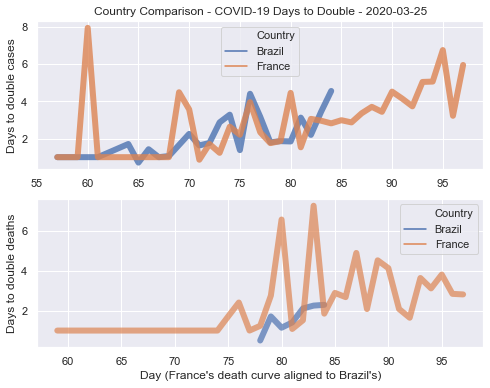

In [66]:
countries_to_show = similar_countries.index[:2]

df_countries_to_show = df_total_cases_top.loc[countries_to_show,:].reset_index()

df_countries_to_show


make_chart_comparison_growth(df_countries_to_show)